# Importing Library

In [1]:
# Importing library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# Check library version
print("---Library version---", end = '\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 122)

mpl.font_manager.fontManager.addfont("C:\\Users\\theer\\Desktop\\Machine Learning\\fonts\\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')


print("---Working Directory---", end = '\n\n')
print('Working Directory: ', os.getcwd(), end='\n')
print('List Directory:', os.listdir(os.getcwd()))

---Library version---
pandas version:  2.2.0
numpy version:  1.26.3
seaborn version:  0.13.1
matplotlib version:  3.8.2

---Working Directory---

Working Directory:  C:\Users\theer\Desktop\Machine Learning\Machine Learning Model\Unsupervised Learning\Principal Component Analysis
List Directory: ['.ipynb_checkpoints', 'doc.txt', 'EC477.ipynb', 'Iris dataset.ipynb']


# Importing Data

In [2]:
data = pd.read_csv(filepath_or_buffer = r"C:\Users\theer\Desktop\Machine Learning\Data\Complete-Data.csv", index_col= 'ลำดับ')
with pd.option_context('display.max_rows', 122):
    display(data.head(10))

,จังหวัดที่สำรวจ,ภูมิลำเนา,จังหวัด,เพศ,อายุ,ระดับการศึกษา,การประกอบอาชีพ,ท่านมีอาชีพรองหรือไม่,อาชีพที่มีรายได้มากอันดับที่ 2,ท่านทำงานในฐานะอะไร,รายได้รวมเฉลี่ยของท่านในปัจจุบัน,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่,ท่านมีภาวะหนี้สินหรือไม่,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,รายได้ที่ได้รับจากการทำงาน,งานที่ท่านทำอยู่ได้รับค่าตอบแทนในประเภท,ทำงานหนักเกินไป,สภาพความเป็นอยู่,งานของท่านมีปัญหา ทะเลาะขัดแย้งบ้างหรือไม่,ในเวลางานท่านเคยประสบเหตุการณ์ไม่ปลอดภัยต่อชีวิตและทรัพย์สินบ้างหรือไม่,ไม่ได้รับค่าตอบแทนตามที่ตกลงไว้,ได้รับค่าตอบแทนล่าช้า,ชั่วโมงทำงานมากเกินไป,ไม่สามารถหยุดงานได้,ไม่มีสวัสดิการ,อาชีพในปัจจุบัน ท่านทำมานานเท่าใด,ก่อนหน้าที่ท่านทำงานในปัจจุบันท่านเคยทำงาน/ประกอบอาชีพหรือไม่,ท่านอยากทำงานในระบบหรือองค์กรณ์ที่มีระบบสวัสดิการหรือไม่,ท่านเคยโดนดูถูก / ไม่ได้รับการยอมรับจากการทำงานหรือไม่,อะไรคือความสำเร็จในชีวิตการทำงานในอนาคตของท่าน,อาชีพ
ลำดับ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19404,พัทลุง,พัทลุง,พัทลุง,หญิง,40,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,มี,มี,แรงงานรับจ้างทั่วไป,ลูกจ้าง,9000,4,ไม่เพียงพอ,มี,นอกระบบ,9000.0,รายชั่วโมง,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,NaN,ไม่ใช่,ไม่ใช่,ใช่,ไม่ใช่,ไม่ใช่,NaN,เคย,ไม่อยาก,NaN,NaN,อาชีพนวด
34948,สงขลา,สงขลา,สงขลา,หญิง,59,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,NaN,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,3000,2,ไม่เพียงพอ,มี,ในระบบ,3000.0,รายวัน,กำไรน้อย/รายได้น้อย,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ใช่,10.0,เคย,อยาก,ไม่เคย,รายได้เพิ่มขึ้น,อาชีพนวด
67177,พระนครศรีอยุธยา,พระนครศรีอยุธยา,พระนครศรีอยุธยา,หญิง,67,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,NaN,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,8000,2,เพียงพอ,ไม่มี,นอกระบบ,3000.0,รายงวด/รายครั้ง,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,6.0,ไม่เคยทำงานมาก่อน,ไม่อยาก,ไม่เคย,ไม่ได้ตั้งเป้าหมาย,อาชีพนวด
80672,นครนายก,นครนายก,นครนายก,หญิง,57,มัธยมศึกษาตอนต้นหรือเทียบเท่า,มี,ไม่มี,NaN,การรวมกลุ่ม,5300,5,เพียงพอ,ไม่มี,นอกระบบ,5000.0,รายเดือน,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,NaN,ไม่เคยทำงานมาก่อน,อยาก,ไม่เคย,รายได้เพิ่มขึ้น,อาชีพนวด
80679,นครนายก,นครนายก,นครนายก,หญิง,54,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,มี,ไม่มี,NaN,การรวมกลุ่ม,6300,6,เพียงพอ,ไม่มี,นอกระบบ,6000.0,รายเดือน,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,NaN,ไม่เคยทำงานมาก่อน,อยาก,NaN,รายได้เพิ่มขึ้น,อาชีพนวด
110744,ยโสธร,ยโสธร,ยโสธร,หญิง,51,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,NaN,นายจ้าง,8000,2,ไม่เพียงพอ,มี,ในระบบ,8000.0,รายงวด/รายครั้ง,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ใช่,18.0,เคย,ไม่อยาก,ไม่เคย,หมดภาระหนี้สิน,อาชีพนวด
136686,สุโขทัย,สุโขทัย,สุโขทัย,หญิง,67,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,มี,มี,เกษตรกร/ประมงน้ำจืด,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,9000,6,ไม่เพียงพอ,มี,ในระบบ,9000.0,รายชั่วโมง,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,NaN,เคย,ไม่อยาก,NaN,หมดภาระหนี้สิน,อาชีพนวด
139320,บึงกาฬ,บึงกาฬ,บึงกาฬ,หญิง,55,ประถมศึกษาหรือต่ำกว่า,มี,มี,เกษตรกร/ประมงน้ำจืด,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,8000,5,ไม่เพียงพอ,มี,ในระบบ,8000.0,รายงวด/รายครั้ง,กำไรน้อย/รายได้น้อย,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,มี,เคย,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,10.0,ไม่เคยทำงานมาก่อน,อยาก,เคย,ไม่ได้ตั้งเป้าหมาย,อาชีพนวด
139987,เพชรบุรี,เพชรบุรี,เพชรบุรี,หญิง,41,มัธยมศึกษาตอนต้นหรือเทียบเท่า,มี,ไม่มี,NaN,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,9000,5,เพียงพอ,ไม่มี,นอกระบบ,9000.0,รายชั่วโมง,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ใช่,13.0,เคย,ไม่อยาก,ไม่เคย,ได้รับการยอมรับ/ยกย่อง,อาชีพนวด


In [3]:
print(f'Record: {data.shape[0]}, Variable: {data.shape[1]}')

Record: 122, Variable: 32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 19404 to 560824
Data columns (total 32 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   จังหวัดที่สำรวจ                                                          122 non-null    object 
 1   ภูมิลำเนา                                                                122 non-null    object 
 2   จังหวัด                                                                  122 non-null    object 
 3   เพศ                                                                      122 non-null    object 
 4   อายุ                                                                     122 non-null    int64  
 5   ระดับการศึกษา                                                            122 non-null    object 
 6   การประกอบอาชีพ                                                          

In [5]:
data.isna().sum()

จังหวัดที่สำรวจ                                                              0
ภูมิลำเนา                                                                    0
จังหวัด                                                                      0
เพศ                                                                          0
อายุ                                                                         0
ระดับการศึกษา                                                                0
การประกอบอาชีพ                                                               0
ท่านมีอาชีพรองหรือไม่                                                        4
อาชีพที่มีรายได้มากอันดับที่ 2                                             103
ท่านทำงานในฐานะอะไร                                                          0
รายได้รวมเฉลี่ยของท่านในปัจจุบัน                                             0
จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน                                        0
โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดื

# Drop NaN

In [6]:
data = data.drop(['อาชีพที่มีรายได้มากอันดับที่ 2', 'ทำงานหนักเกินไป', 'รายได้ที่ได้รับจากการทำงาน', 'ในเวลางานท่านเคยประสบเหตุการณ์ไม่ปลอดภัยต่อชีวิตและทรัพย์สินบ้างหรือไม่', 'อาชีพในปัจจุบัน ท่านทำมานานเท่าใด', 'ท่านเคยโดนดูถูก / ไม่ได้รับการยอมรับจากการทำงานหรือไม่', 'อะไรคือความสำเร็จในชีวิตการทำงานในอนาคตของท่าน'], axis=1)

# Select Feature and Traget

In [7]:
# data_feature = data.iloc[:,[4,5,11,13]]
# data_feature

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 19404 to 560824
Data columns (total 25 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   จังหวัดที่สำรวจ                                                122 non-null    object
 1   ภูมิลำเนา                                                      122 non-null    object
 2   จังหวัด                                                        122 non-null    object
 3   เพศ                                                            122 non-null    object
 4   อายุ                                                           122 non-null    int64 
 5   ระดับการศึกษา                                                  122 non-null    object
 6   การประกอบอาชีพ                                                 122 non-null    object
 7   ท่านมีอาชีพรองหรือไม่                                          118 no

In [9]:
X = data.iloc[:, [i for i in range(len(data.columns)) if i != 11]]
y = data.iloc[:,11]

# Label Encoder

In [10]:
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])

In [11]:
y = label_encoder.fit_transform(y)
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

# Scale Data

In [12]:
# Initialize StandardScaler
scaler = StandardScaler()

In [13]:
# Fit scaler to the data and transform it
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-0.42834858, -0.38052009, -0.43249233, ..., -1.28536917,
         1.03334245,  0.        ],
       [ 0.22853234,  0.21945989,  0.2261437 , ..., -1.28536917,
        -0.9677334 ,  0.        ],
       [-0.50133535, -0.45551759, -0.50567411, ...,  0.77798661,
         1.03334245,  0.        ],
       ...,
       [-1.88808398, -1.43048506, -1.45703727, ..., -1.28536917,
        -0.9677334 ,  0.        ],
       [ 1.10437358,  1.11942987,  1.10432508, ..., -1.28536917,
        -0.9677334 ,  0.        ],
       [ 0.88541327,  0.89443737,  0.88477973, ...,  0.77798661,
         1.03334245,  0.        ]])

In [14]:
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df

,จังหวัดที่สำรวจ,ภูมิลำเนา,จังหวัด,เพศ,อายุ,ระดับการศึกษา,การประกอบอาชีพ,ท่านมีอาชีพรองหรือไม่,ท่านทำงานในฐานะอะไร,รายได้รวมเฉลี่ยของท่านในปัจจุบัน,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,ท่านมีภาวะหนี้สินหรือไม่,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,งานที่ท่านทำอยู่ได้รับค่าตอบแทนในประเภท,สภาพความเป็นอยู่,งานของท่านมีปัญหา ทะเลาะขัดแย้งบ้างหรือไม่,ไม่ได้รับค่าตอบแทนตามที่ตกลงไว้,ได้รับค่าตอบแทนล่าช้า,ชั่วโมงทำงานมากเกินไป,ไม่สามารถหยุดงานได้,ไม่มีสวัสดิการ,ก่อนหน้าที่ท่านทำงานในปัจจุบันท่านเคยทำงาน/ประกอบอาชีพหรือไม่,ท่านอยากทำงานในระบบหรือองค์กรณ์ที่มีระบบสวัสดิการหรือไม่,อาชีพ
0,-0.428349,-0.380520,-0.432492,0.360041,-1.136360,1.164790,0.0,-2.106152,0.530270,0.017602,0.991552,-1.016530,-0.764471,-0.658770,-0.364346,0.103203,0.129099,0.129099,-5.431390,0.0,0.469042,-1.285369,1.033342,0.0
1,0.228532,0.219460,0.226144,0.360041,0.518215,-1.078963,0.0,0.295255,-0.157953,-1.258115,-0.309194,-1.016530,1.308094,0.265022,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,-2.132007,-1.285369,-0.967733,0.0
2,-0.501335,-0.455518,-0.505674,0.360041,1.214878,-1.078963,0.0,0.295255,-0.157953,-0.195017,-0.309194,0.983739,-0.764471,-1.582561,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,0.469042,0.777987,1.033342,0.0
3,-1.304190,-1.280490,-1.310674,0.360041,0.344049,0.416872,0.0,0.295255,-2.222621,-0.769090,1.641925,0.983739,-0.764471,1.188814,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,0.469042,0.777987,-0.967733,0.0
4,-1.304190,-1.280490,-1.310674,0.360041,0.082800,1.164790,0.0,0.295255,-2.222621,-0.556471,2.292298,0.983739,-0.764471,1.188814,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,0.469042,0.777987,-0.967733,0.0
5,-0.136402,-0.155528,-0.139765,0.360041,-0.178449,-1.078963,0.0,0.295255,-0.846176,-0.195017,-0.309194,-1.016530,1.308094,-1.582561,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,-2.132007,-1.285369,1.033342,0.0
6,0.739440,0.744442,0.738416,0.360041,1.214878,1.164790,0.0,-2.106152,-0.157953,0.017602,2.292298,-1.016530,1.308094,-0.658770,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,0.469042,-1.285369,1.033342,0.0
7,-0.866269,-0.830505,-0.871583,0.360041,0.169883,-1.078963,0.0,-2.106152,-0.157953,-0.195017,1.641925,-1.016530,1.308094,-1.582561,-0.364346,-4.093724,0.129099,0.129099,0.184115,0.0,0.469042,0.777987,-0.967733,0.0
8,1.250347,1.269425,1.250689,0.360041,-1.049278,0.416872,0.0,0.295255,-0.157953,0.017602,1.641925,0.983739,-0.764471,-0.658770,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,-2.132007,-1.285369,1.033342,0.0
9,0.593466,0.594447,0.592053,-2.777460,0.344049,-1.078963,0.0,0.295255,-2.222621,-0.939186,-0.959567,-1.016530,1.308094,0.265022,-0.364346,0.103203,0.129099,0.129099,0.184115,0.0,0.469042,0.777987,1.033342,0.0


# Model 

In [15]:
print(f'Record: {scaled_df.shape[0]}, Variable: {scaled_df.shape[1]}')

Record: 122, Variable: 24


In [16]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_df)

In [17]:
target_names = ['ไม่เพียงพอ', 'พอเพียง']

In [18]:
colors = ["turquoise", "darkorange"]

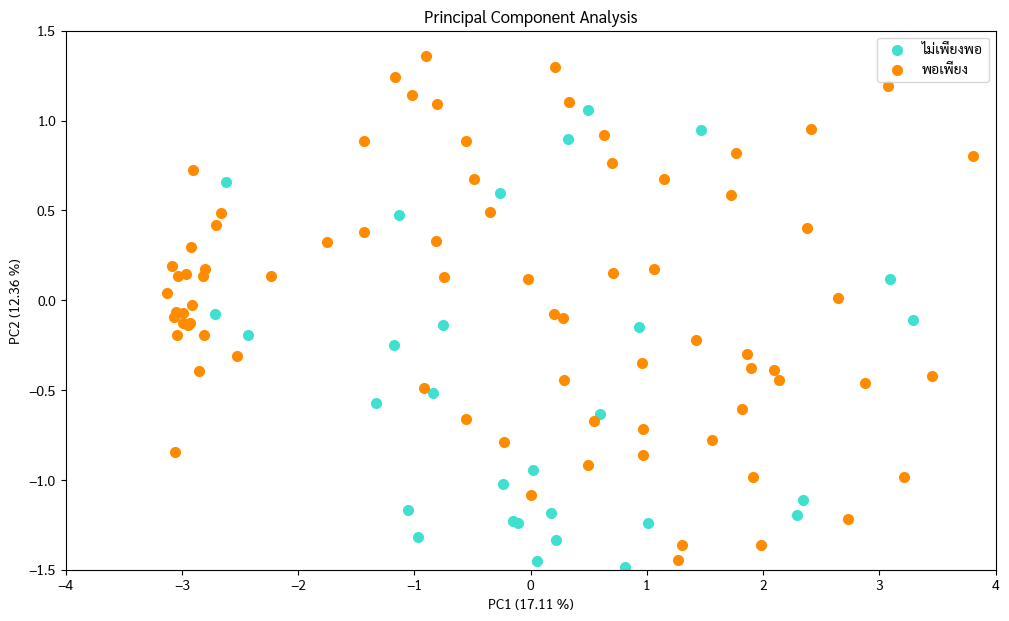

In [19]:
# Assuming X_transformed is a list containing PCA transformed data
for X_transformed in [X_pca]:  # Assuming X_pca is your PCA transformed data
    plt.figure(figsize=(12, 7))
    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name)

    plt.title("Principal Component Analysis")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f} %)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f} %)")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()


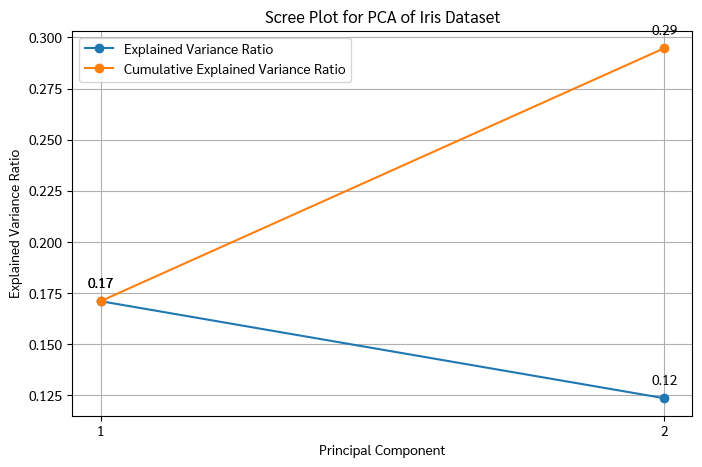

In [20]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='-', label='Explained Variance Ratio')
plt.plot(np.arange(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')

plt.title('Scree Plot for PCA of Iris Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, n_components + 1))
plt.legend()
plt.grid(True)

# Annotate each point with its value
for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), explained_variance_ratio)):
    plt.annotate(f'{explained_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), cumulative_variance_ratio)):
    plt.annotate(f'{cumulative_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


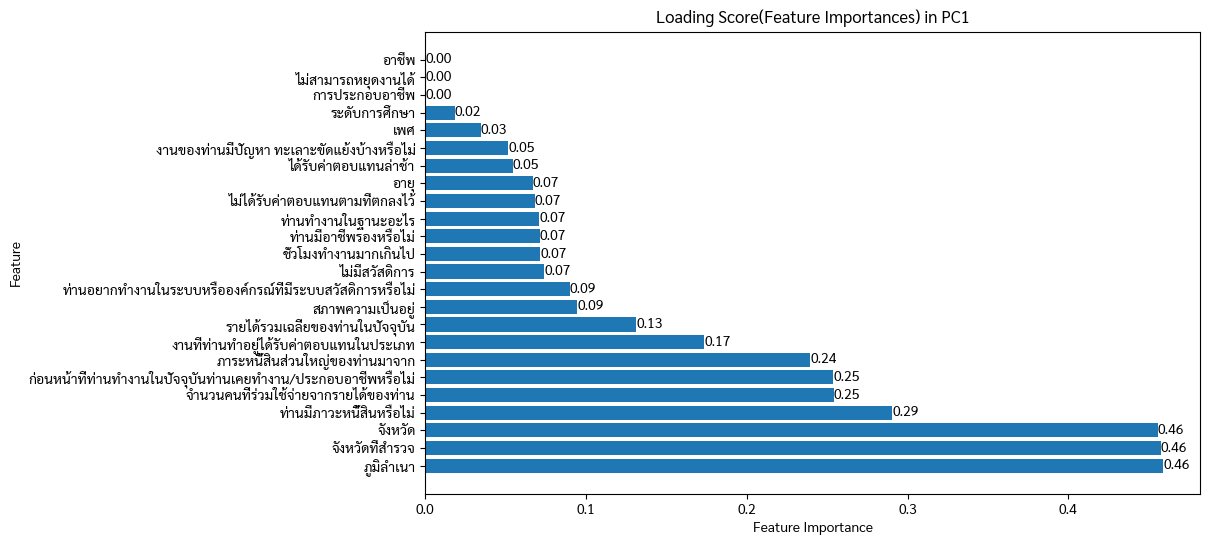

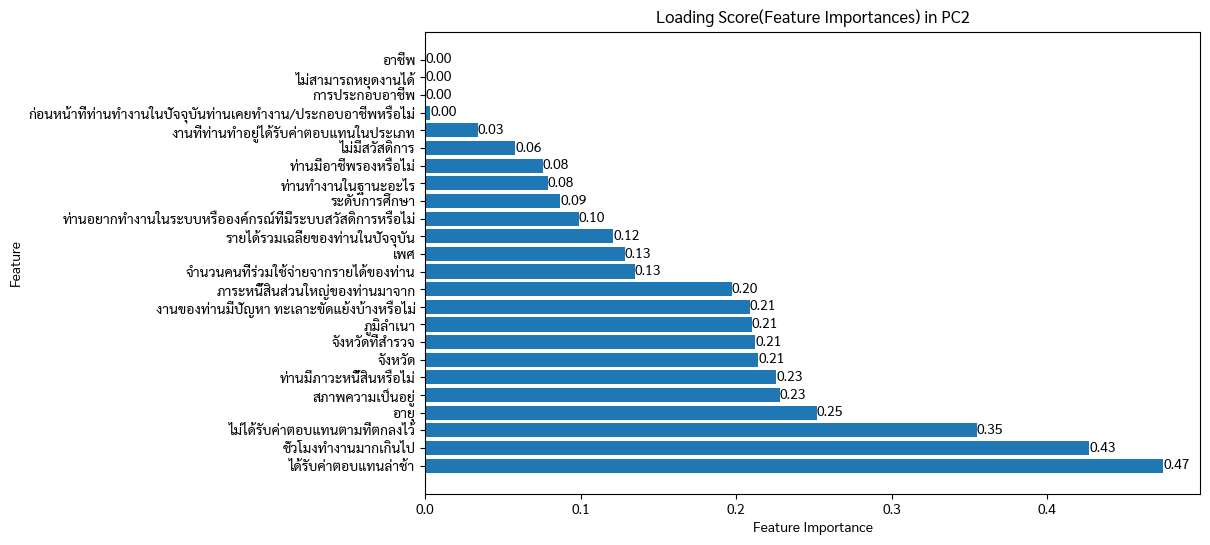

In [21]:
def plot_feature_importances(importances, feature_names, title):
    plt.figure(figsize=(10, 6))
    sorted_idx = importances.argsort()[::-1]
    plt.barh(range(len(importances)), importances[sorted_idx], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(title)
    
    # Annotate each bar with its value
    for i, v in enumerate(importances[sorted_idx]):
        plt.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')
    plt.show()

# Get feature importances (absolute values of PCA components)
feature_importances = np.abs(pca.components_)

# Plot feature importances for each principal component
for i in range(n_components):
    plot_feature_importances(feature_importances[i], X.columns, f'Loading Score(Feature Importances) in PC{i+1}')


In [22]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   จังหวัดที่สำรวจ                                                122 non-null    float64
 1   ภูมิลำเนา                                                      122 non-null    float64
 2   จังหวัด                                                        122 non-null    float64
 3   เพศ                                                            122 non-null    float64
 4   อายุ                                                           122 non-null    float64
 5   ระดับการศึกษา                                                  122 non-null    float64
 6   การประกอบอาชีพ                                                 122 non-null    float64
 7   ท่านมีอาชีพรองหรือไม่                                         

# Round 2

In [66]:
scaled_df_2 = scaled_df.iloc[:,[0,11,10,12,17,18,16,9]]
scaled_df_2.head()

,จังหวัดที่สำรวจ,ท่านมีภาวะหนี้สินหรือไม่,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,ได้รับค่าตอบแทนล่าช้า,ชั่วโมงทำงานมากเกินไป,ไม่ได้รับค่าตอบแทนตามที่ตกลงไว้,รายได้รวมเฉลี่ยของท่านในปัจจุบัน
0,-0.428349,-1.016530,0.991552,-0.764471,0.129099,-5.431390,0.129099,0.017602
1,0.228532,-1.016530,-0.309194,1.308094,0.129099,0.184115,0.129099,-1.258115
2,-0.501335,0.983739,-0.309194,-0.764471,0.129099,0.184115,0.129099,-0.195017
3,-1.304190,0.983739,1.641925,-0.764471,0.129099,0.184115,0.129099,-0.769090
4,-1.304190,0.983739,2.292298,-0.764471,0.129099,0.184115,0.129099,-0.556471


In [77]:
y = label_encoder.fit_transform(data.iloc[:,[11]])
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [78]:
pca = PCA(n_components=2, random_state=None)
X_pca = pca.fit_transform(scaled_df_2)

In [79]:
target_names = ['ไม่เพียงพอ', 'พอเพียง']
colors = ["turquoise", "darkorange"]

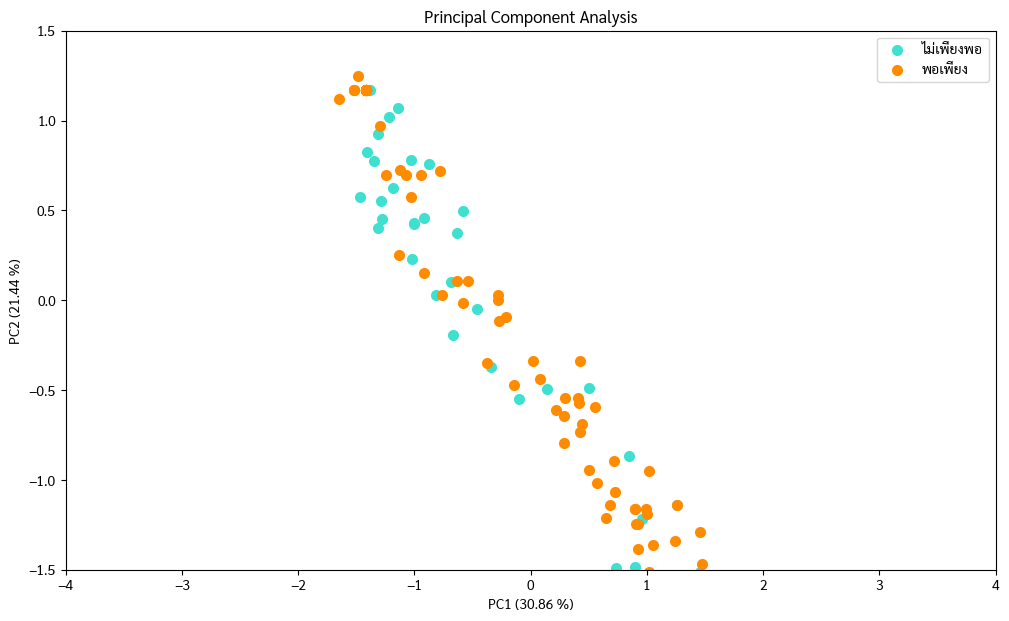

In [80]:
# Assuming X_transformed is a list containing PCA transformed data
for X_transformed in [X_pca]:  # Assuming X_pca is your PCA transformed data
    plt.figure(figsize=(12, 7))
    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name)

    plt.title("Principal Component Analysis")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f} %)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f} %)")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

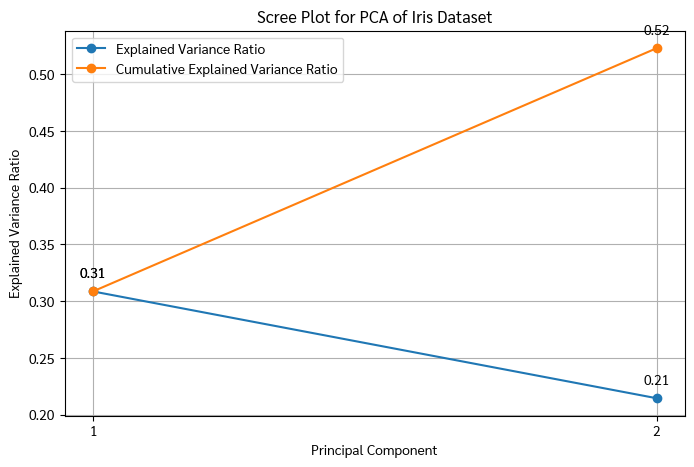

In [63]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='-', label='Explained Variance Ratio')
plt.plot(np.arange(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')

plt.title('Scree Plot for PCA of Iris Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, n_components + 1))
plt.legend()
plt.grid(True)

# Annotate each point with its value
for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), explained_variance_ratio)):
    plt.annotate(f'{explained_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), cumulative_variance_ratio)):
    plt.annotate(f'{cumulative_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


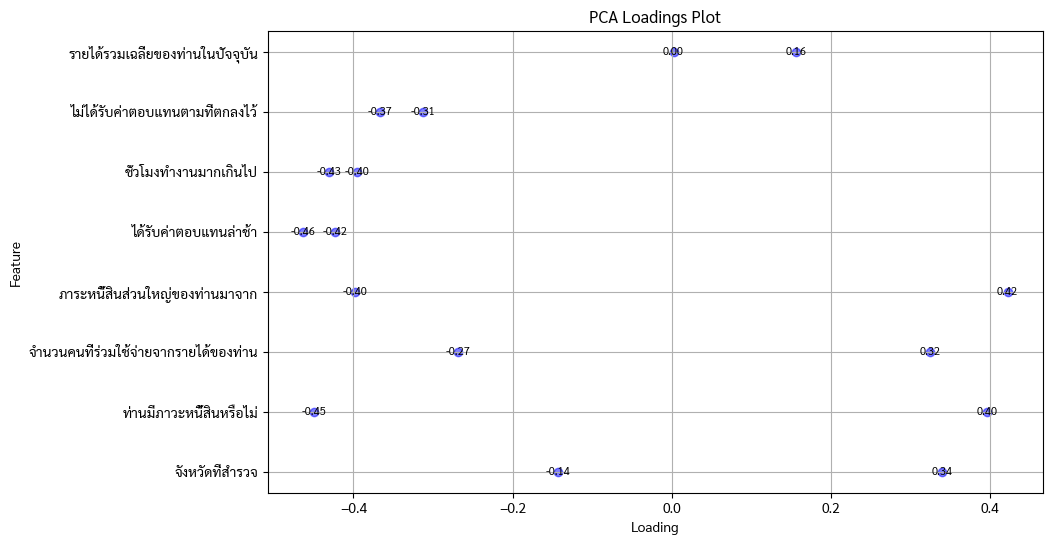

In [72]:
# Assuming pca is your PCA object already fitted
loadings = pca.components_

# Define feature names (assuming you have them)
feature_names = scaled_df_2.columns

# Create the plot
plt.figure(figsize=(10, 6))
for i, component in enumerate(loadings):
    plt.scatter(component, feature_names, color='b', alpha=0.5)
    for j, (x, y) in enumerate(zip(component, feature_names)):
        plt.text(x, y, f'{x:.2f}', fontsize=8, ha='center', va='center')
    plt.xlabel('Loading')
    plt.ylabel('Feature')
    plt.title('PCA Loadings Plot')
plt.grid(True)
plt.show()

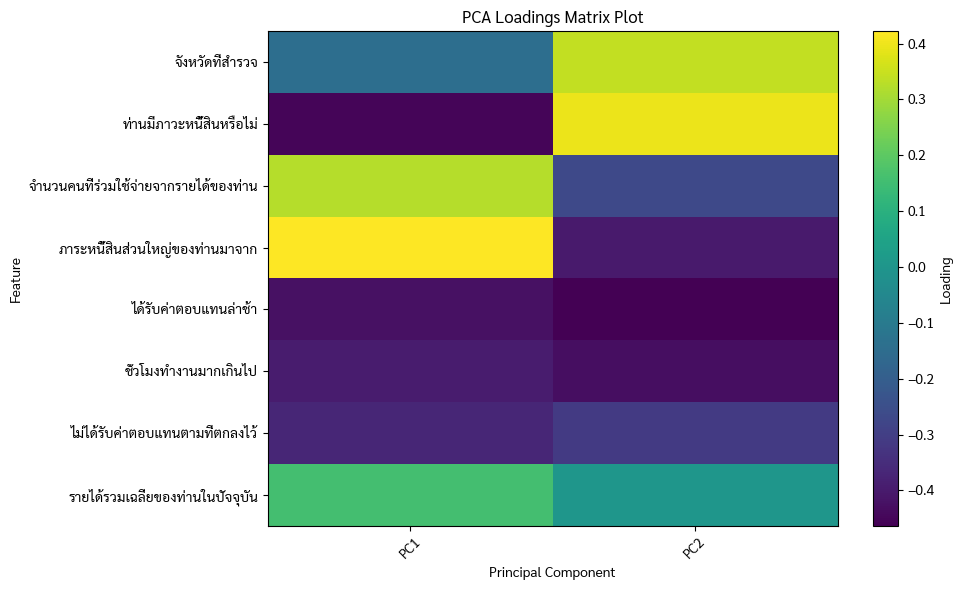

In [74]:
# Assuming pca is your PCA object already fitted
loadings = pca.components_

# Define feature names (assuming you have them)
feature_names = scaled_df_2.columns

# Create DataFrame for loadings matrix
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=feature_names)

# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(loadings_df, cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar(label='Loading')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.title('PCA Loadings Matrix Plot')
plt.xticks(np.arange(loadings.shape[0]), loadings_df.columns, rotation=45)
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.tight_layout()
plt.show()

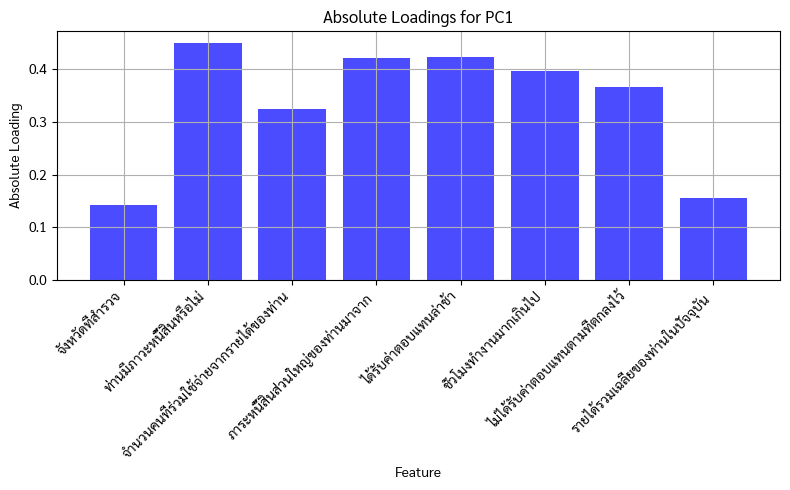

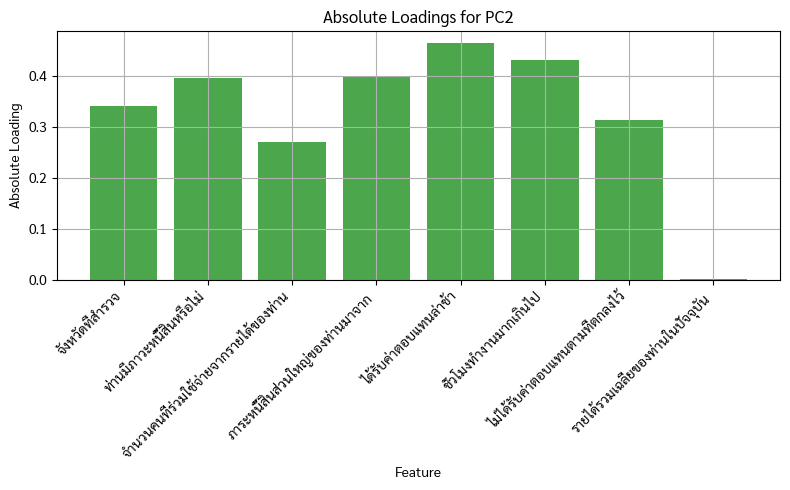

In [75]:
# Assuming pca is your PCA object already fitted
loadings_abs = np.abs(pca.components_)

# Define feature names (assuming you have them)
feature_names = scaled_df_2.columns

# Create DataFrame for loadings matrix
loadings_df = pd.DataFrame(loadings_abs.T, columns=[f'PC{i+1}' for i in range(loadings_abs.shape[0])], index=feature_names)

# Plot for PC1
plt.figure(figsize=(8, 5))
plt.bar(feature_names, loadings_df['PC1'], color='blue', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Absolute Loading')
plt.title('Absolute Loadings for PC1')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for PC2
plt.figure(figsize=(8, 5))
plt.bar(feature_names, loadings_df['PC2'], color='green', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Absolute Loading')
plt.title('Absolute Loadings for PC2')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [83]:
scaled_df_2

,จังหวัดที่สำรวจ,ท่านมีภาวะหนี้สินหรือไม่,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,ได้รับค่าตอบแทนล่าช้า,ชั่วโมงทำงานมากเกินไป,ไม่ได้รับค่าตอบแทนตามที่ตกลงไว้,รายได้รวมเฉลี่ยของท่านในปัจจุบัน
0,-0.428349,-1.016530,0.991552,-0.764471,0.129099,-5.431390,0.129099,0.017602
1,0.228532,-1.016530,-0.309194,1.308094,0.129099,0.184115,0.129099,-1.258115
2,-0.501335,0.983739,-0.309194,-0.764471,0.129099,0.184115,0.129099,-0.195017
3,-1.304190,0.983739,1.641925,-0.764471,0.129099,0.184115,0.129099,-0.769090
4,-1.304190,0.983739,2.292298,-0.764471,0.129099,0.184115,0.129099,-0.556471
5,-0.136402,-1.016530,-0.309194,1.308094,0.129099,0.184115,0.129099,-0.195017
6,0.739440,-1.016530,2.292298,1.308094,0.129099,0.184115,0.129099,0.017602
7,-0.866269,-1.016530,1.641925,1.308094,0.129099,0.184115,0.129099,-0.195017
8,1.250347,0.983739,1.641925,-0.764471,0.129099,0.184115,0.129099,0.017602
9,0.593466,-1.016530,-0.959567,1.308094,0.129099,0.184115,0.129099,-0.939186


In [84]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])